In [81]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scikeras.wrappers import KerasClassifier

In [82]:
df_train = pd.read_excel('both_data.xlsx', sheet_name= 'train', header=None)
print('Train Data:')
display(df_train.head())
print()
df_test = pd.read_excel('both_data.xlsx', sheet_name= 'test', header=None)
print('Test Data:')
display(df_test.head())


Train Data:


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,10,1,1,0,0,0,4,6,0,...,0,0,0,0,0,0,0,0,0,0
3,21,10,4,4,0,1,1,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,27,12,3,3,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0



Test Data:


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,5,0,6,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,14,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0
4,27,12,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0


In [83]:
X_train_df = df_train.iloc[:, :14]
y_train_df = df_train.iloc[:, 14:]
X_test_df = df_test.iloc[:, :14]
y_test_df = df_test.iloc[:, 14:]

Box Plot of training data:


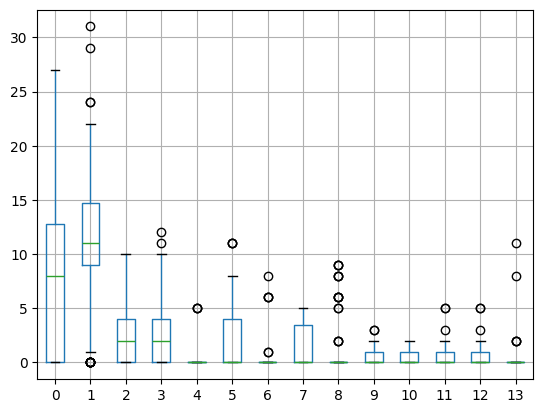

Density Plot of overall training Data:


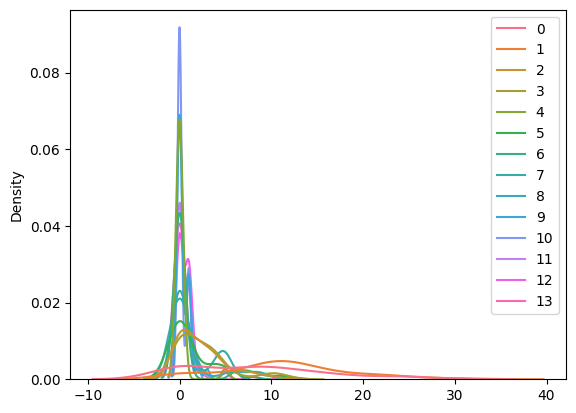

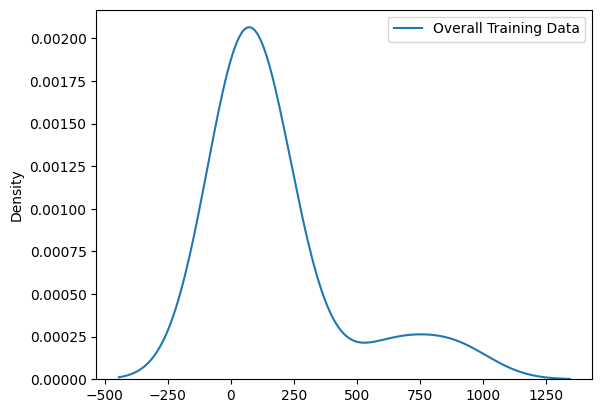

Box Plot of testing data:


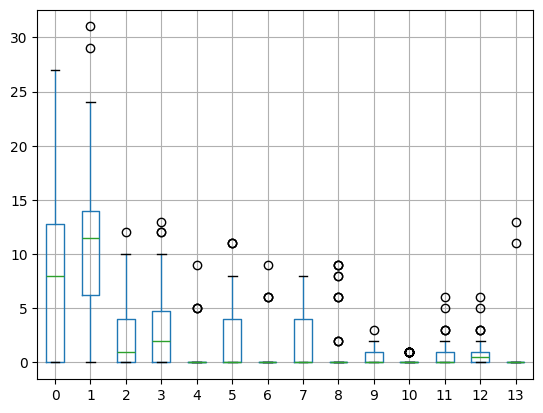

Density Plot of overall test Data:


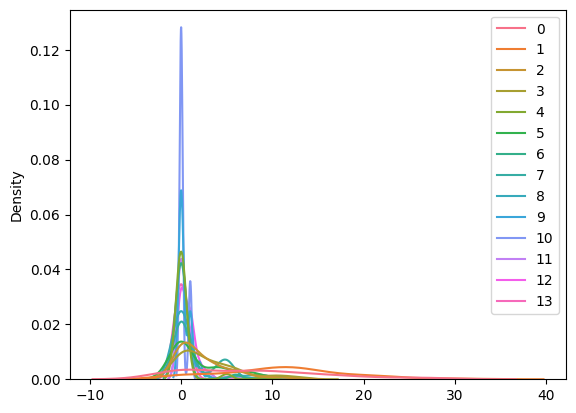

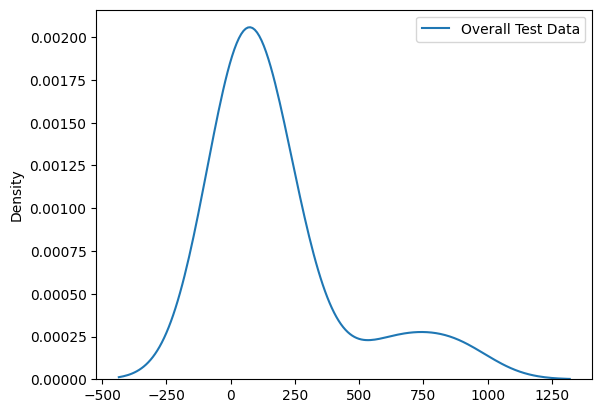

In [84]:
print('Box Plot of training data:')
X_train_df.boxplot()
plt.show()

print('Density Plot of overall training Data:')
sns.kdeplot(X_train_df)
plt.show()

sns.kdeplot(data=X_train_df.sum(), label="Overall Training Data")
plt.legend()
plt.show()

print('Box Plot of testing data:')
X_test_df.boxplot()
plt.show()

print('Density Plot of overall test Data:')
sns.kdeplot(X_test_df)
plt.show()

sns.kdeplot(data=X_test_df.sum(), label="Overall Test Data")
plt.legend()
plt.show()

In [85]:
normalized_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

## Normalize testing data
normalized_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

Training Data Box Plot


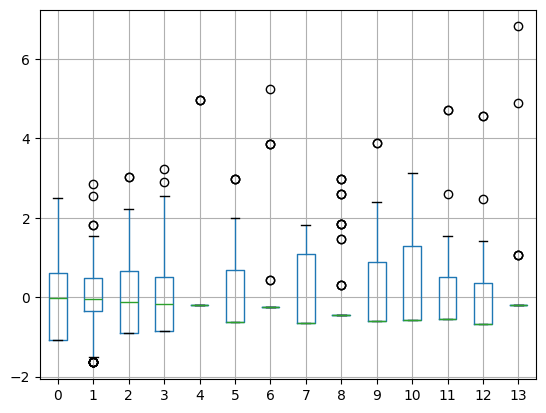

Test Data Box Plot


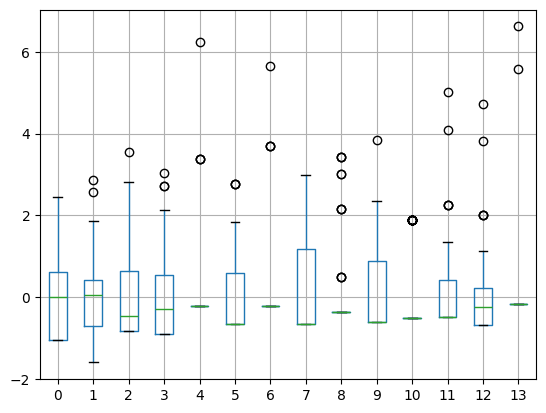

Density overall Plot of overall Normalized Training Data


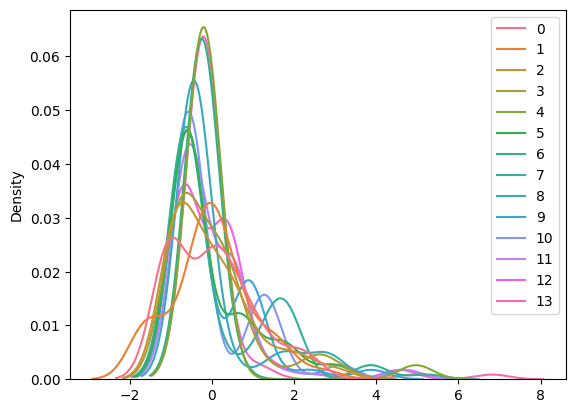

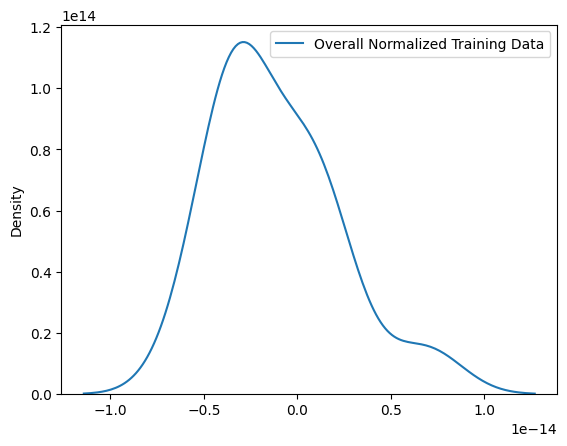

Density overall Plot of overall Normalized Test Data


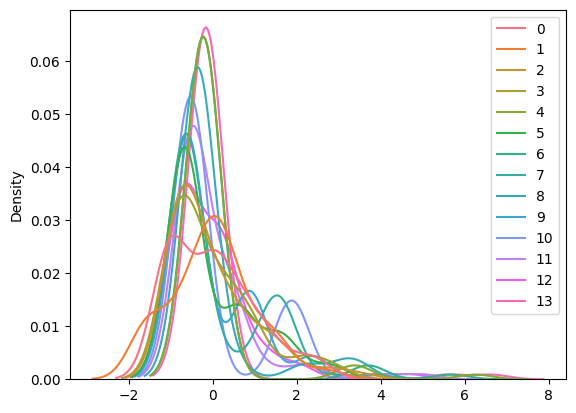

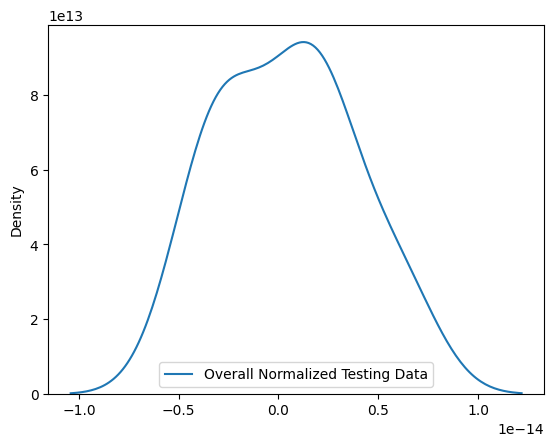

In [86]:
print('Training Data Box Plot')
normalized_X_train_df.boxplot()
plt.show()

print('Test Data Box Plot')
normalized_X_test_df.boxplot()
plt.show()

print('Density overall Plot of overall Normalized Training Data')
sns.kdeplot(normalized_X_train_df)
plt.show()

sns.kdeplot(data = normalized_X_train_df.sum(axis=0), label="Overall Normalized Training Data")
plt.legend(loc='best')
plt.show()

print('Density overall Plot of overall Normalized Test Data')
sns.kdeplot(normalized_X_test_df)
plt.show()

sns.kdeplot(normalized_X_test_df.sum(axis=0), label="Overall Normalized Testing Data")
plt.legend(loc='best')
plt.show()


In [164]:
# Convert dataframes into numpy array
X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values 

# Printing dimensions
#print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

## Training data
count = 1
cls = 1
y_cls = []
for i in range (104):
    if count == 4:
        count = 1
        cls +=1
    else:
        y_cls.append(cls)
        count += 1

y_labeled = np.asarray(y_cls)
print(y_labeled)

[ 1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7  8  8  8
  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15 16 16 16
 17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 22 23 23 23 24 24 24
 25 25 25 26 26 26]


In [131]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
import tensorflow as tf

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(80, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(70, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
    return model

In [132]:

# load dataset
#X, y = get_dataset()
n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X_train, y_train , verbose=0, epochs=280)
print(model.metrics_names)



['loss', 'compile_metrics']


In [128]:
print(X_train.shape[0])

78


In [149]:
# Best score on training dataset
train_score = model.evaluate(X_train, y_train, verbose=2) 
print('Train loss:', train_score[0]) 
print('Train accuracy:', train_score[1]) 

3/3 - 0s - 8ms/step - accuracy: 0.9995 - loss: 0.0061
Train loss: 0.006107121706008911
Train accuracy: 0.999506950378418


In [92]:
# Best score on testing dataset
test_score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', test_score[0]) 
print('Test accuracy:', test_score[1])

Test loss: 0.04910556972026825
Test accuracy: 0.9911242723464966


In [151]:
# Преобразование y_train и y_test из one-hot encoding в одномерный массив
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Проверка размеров после преобразования
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (78,)
y_test shape: (78,)


In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svm_clf = SVC(probability=True)
grid_svm = GridSearchCV(svm_clf, param_grid, cv=3, n_jobs=-1, verbose=0)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_params_
print("BEST SVM Parameters:", best_svm)
print("BEST SVM Score:", grid_svm.best_score_)

BEST SVM Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
BEST SVM Score: 0.9102564102564102


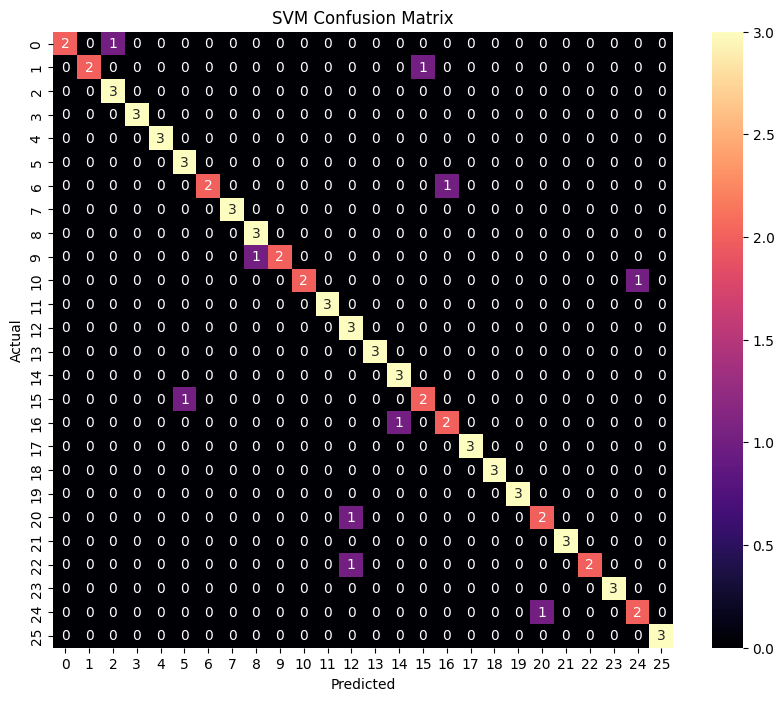

In [117]:
y_pred_svm = grid_svm.best_estimator_.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_svm,annot=True,fmt='d',cmap='magma')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()